In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import sys
sys.path.insert(0,"..")
from profiler import *
from utils import *

Available workers: 16


In [3]:
dmel1 = WingbeatDatasetProfiler(dsname="Melanogaster_RL/Z", custom_label=[0])
dsuz1 = WingbeatDatasetProfiler(dsname="Suzukii_RL/Y", custom_label=[1])
dmel2 = WingbeatDatasetProfiler(dsname="Melanogaster_RL/Y", custom_label=[0])
dsuz2 = WingbeatDatasetProfiler(dsname="Suzukii_RL/X", custom_label=[1])

Found 24763 in dataset: Melanogaster_RL/Z, and 1 label(s): ['D. melanogaster']
Label(s) changed to [0]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.
Found 25732 in dataset: Suzukii_RL/Y, and 1 label(s): ['D. suzukii']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.
Found 29002 in dataset: Melanogaster_RL/Y, and 1 label(s): ['D. melanogaster']
Label(s) changed to [0]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.
Found 19657 in dataset: Suzukii_RL/X, and 1 label(s): ['D. suzukii']
Label(s) changed to [1]


Creating a pandas Dataframe with file-paths, clean-scores, duration, sums of abs values, indice and labels..
Finished.


In [4]:
maxpeaks = 15
minpeaks = 1
maxscore = 12
minscore = 2.5
selection = f"peaks>{minpeaks} & peaks<{maxpeaks} & score>{minscore} & score<={maxscore}"

100%|██████████| 20/20 [00:00<00:00, 66.42it/s]


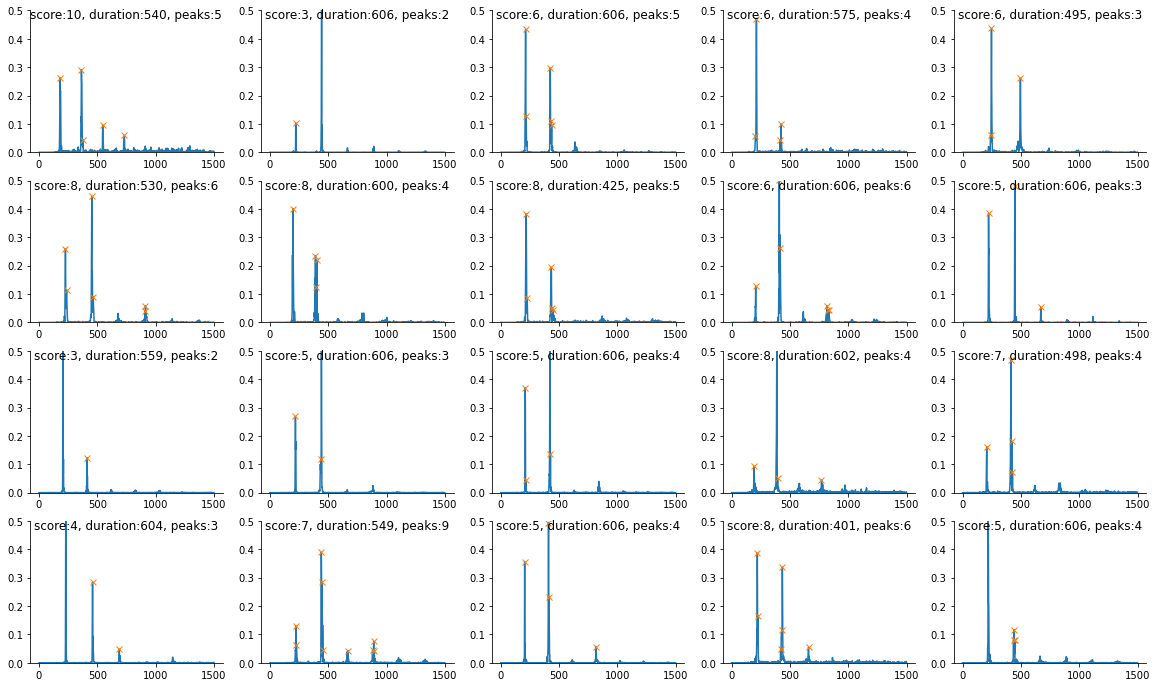

In [5]:
# %matplotlib inline
df = dmel1.df.query(selection)
dmel1.plot_random_psds(df, noaxis=False)#.sample(len(df),replace=False), noaxis=False)

100%|██████████| 20/20 [00:00<00:00, 24.67it/s]


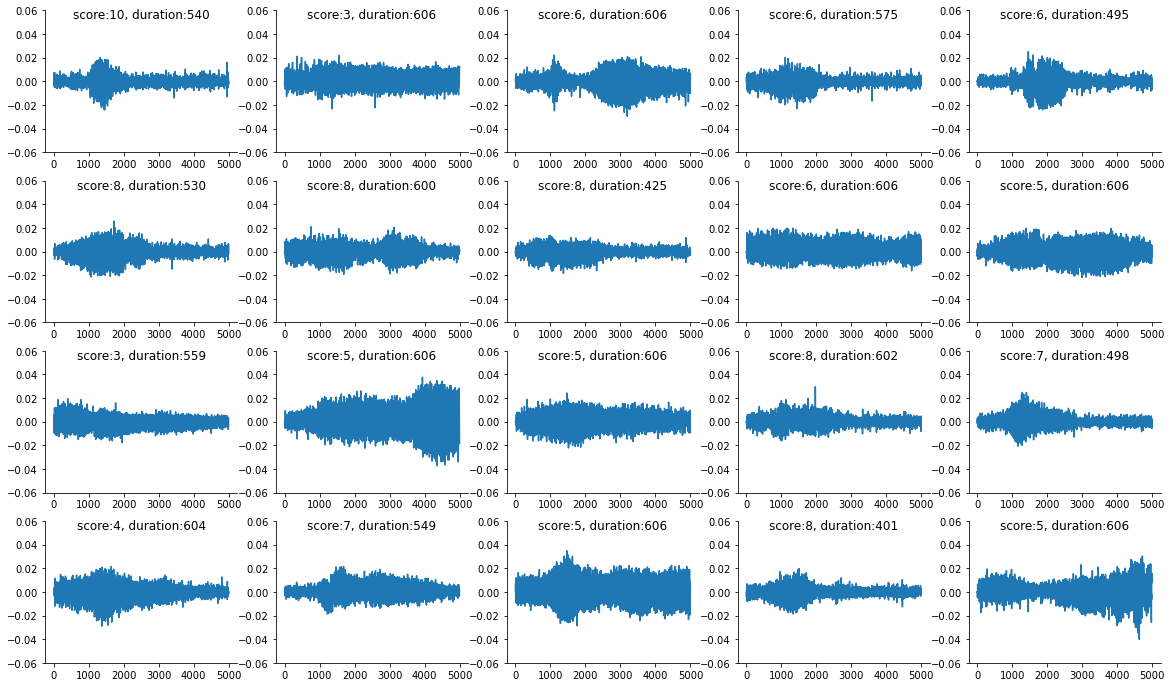

In [6]:
# %matplotlib qt
dmel1.plot_random_wbts(df=df, noaxis=False)#.sample(len(df),replace=False), noaxis=False)

## PSD

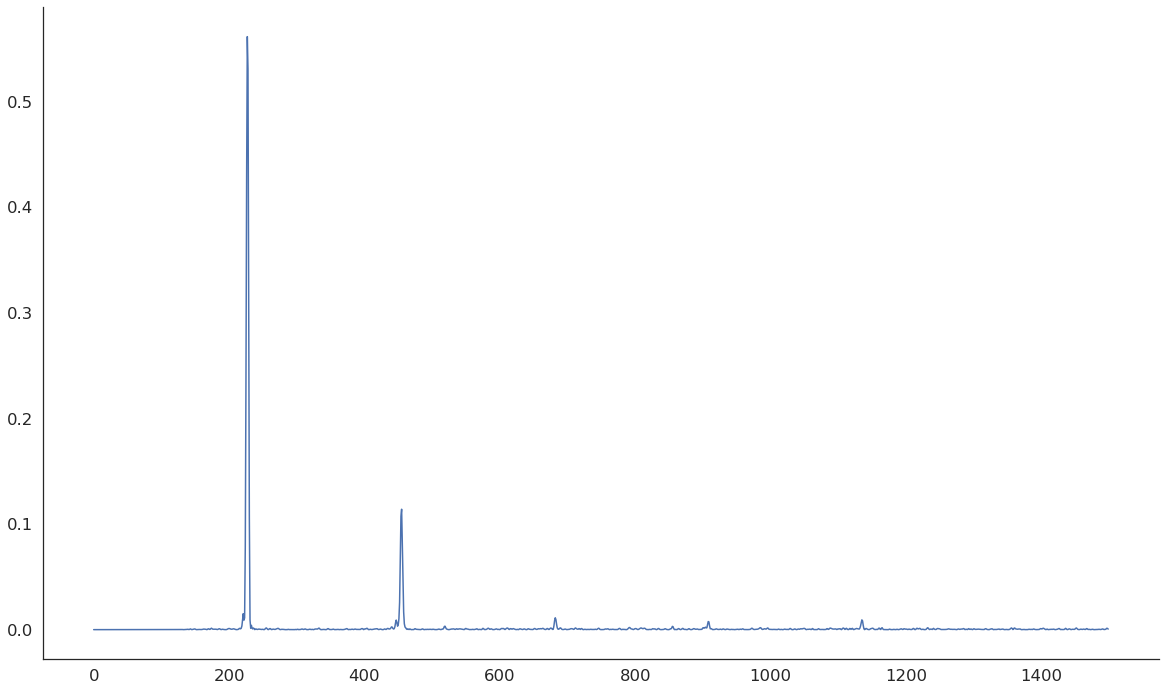

In [7]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.figure(figsize=(20,12))
plt.plot(dsuz1.psds[14][0].T);
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/psd.eps", format='eps', bbox_inches='tight')

## WBT

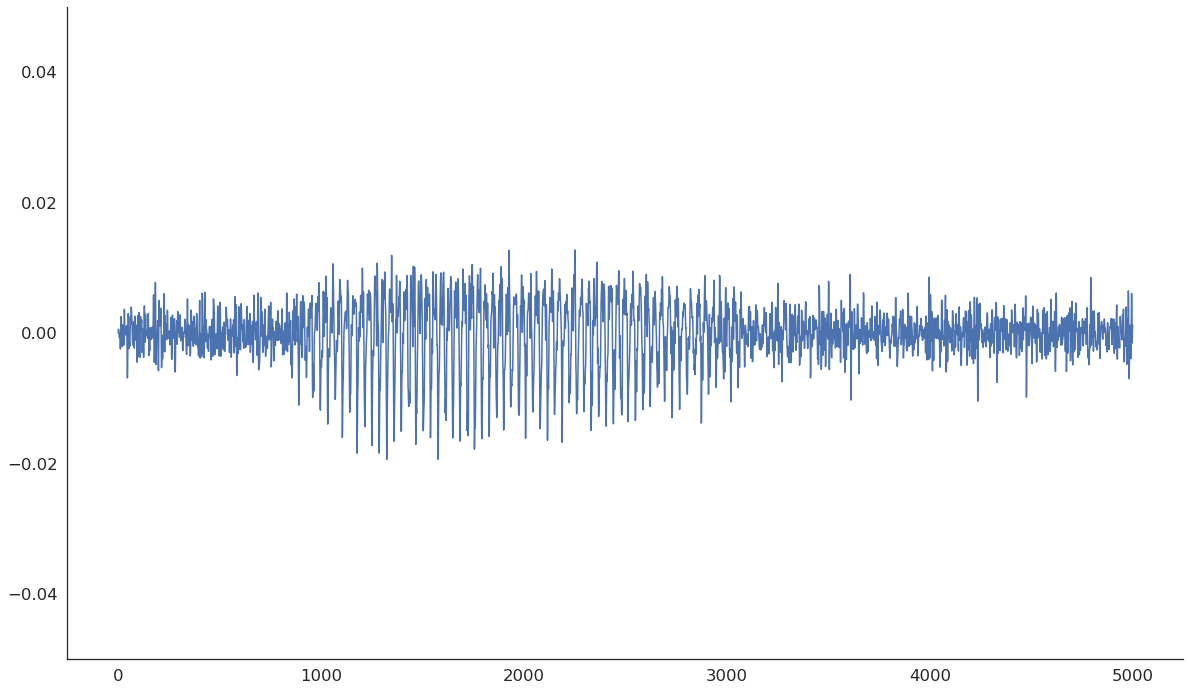

In [8]:
plt.figure(figsize=(20,12))
plt.plot(dsuz1.wbts[14][0].T);
plt.ylim(-.05,.05);
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/wbt.eps", format='eps', bbox_inches='tight');

### Zoomed wbt

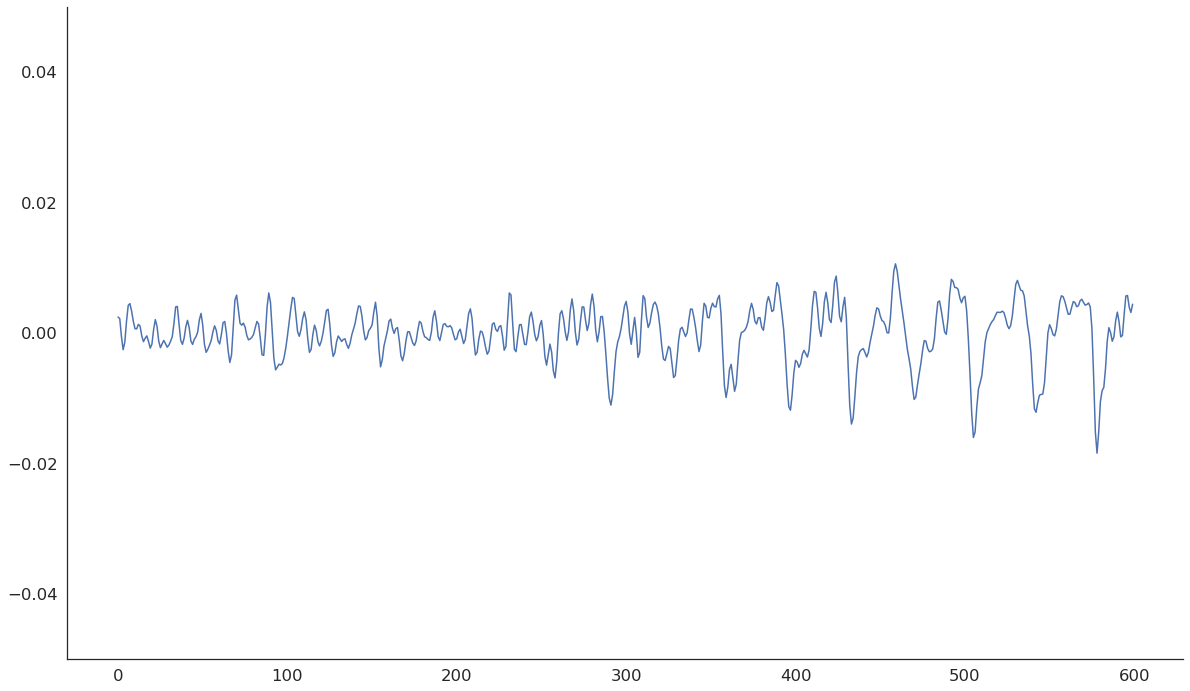

In [9]:
plt.figure(figsize=(20,12))
plt.plot(dsuz1.wbts[14][0].T[600:1200]);
plt.ylim(-.05,.05);
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/wbt_zoom.eps", format='eps', bbox_inches='tight');

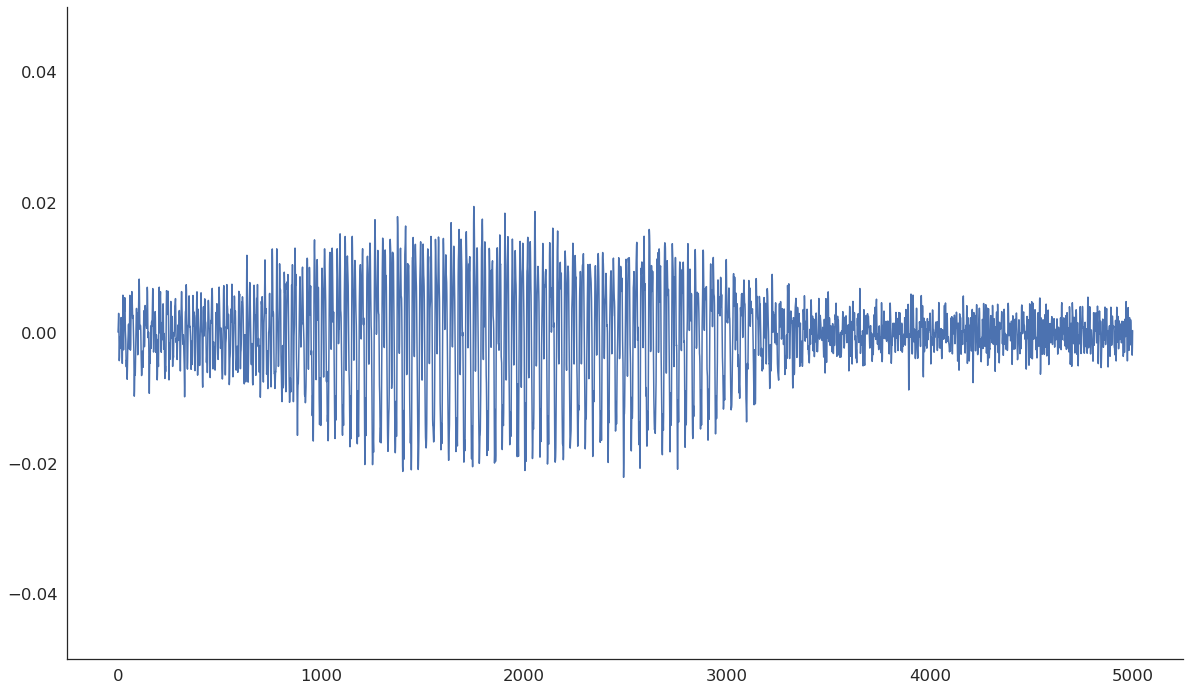

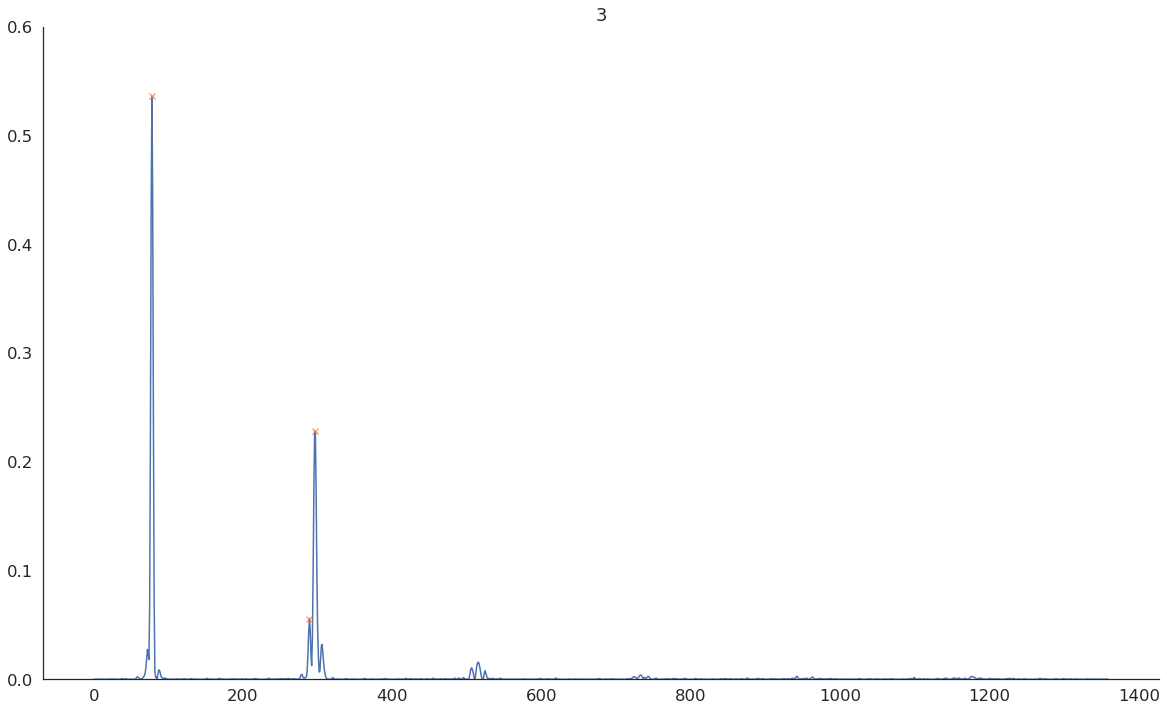

In [23]:
plt.figure(figsize=(20,12))
plt.plot(dmel1.wbts[39][0].T);
plt.ylim(-.05,.05);
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/clean_mel_wbt.eps", format='eps', bbox_inches='tight');

plt.figure(figsize=(20,12))
plt.ylim(0,.6)
show_peaks(dmel1.psds[39][0].T[140:1500]);

plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/clean_mel_psd.eps", format='eps', bbox_inches='tight')

In [25]:
dmel1.psds[39][0].T[140:1500].sum()

4.2416706

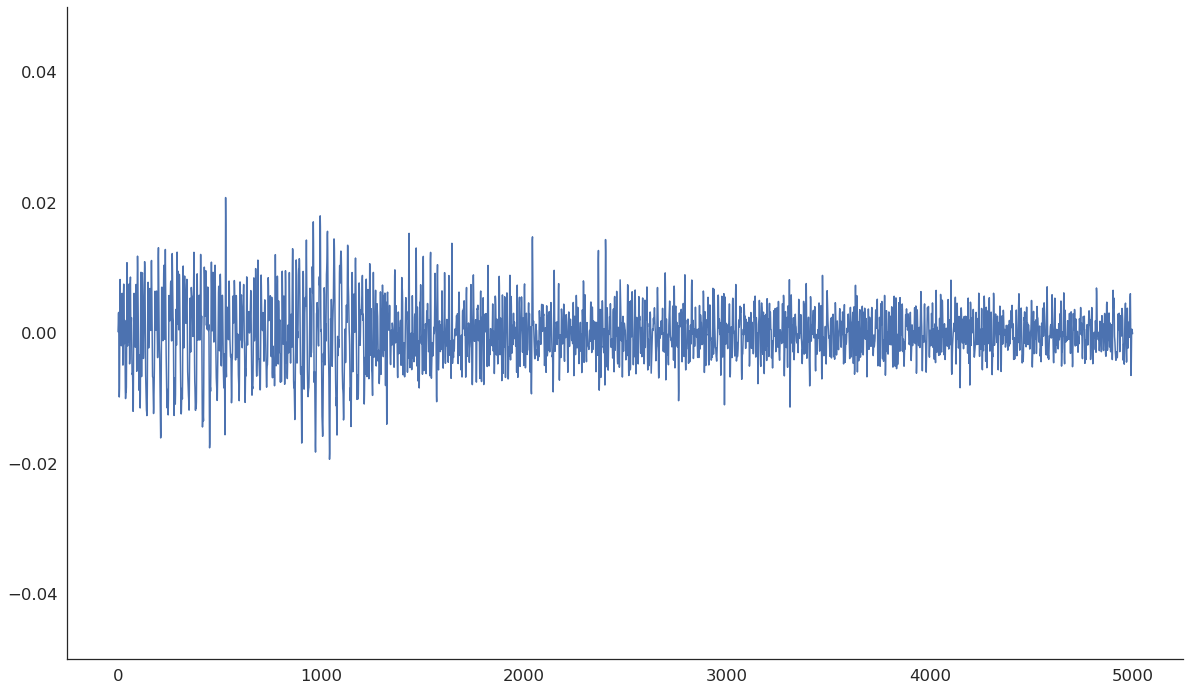

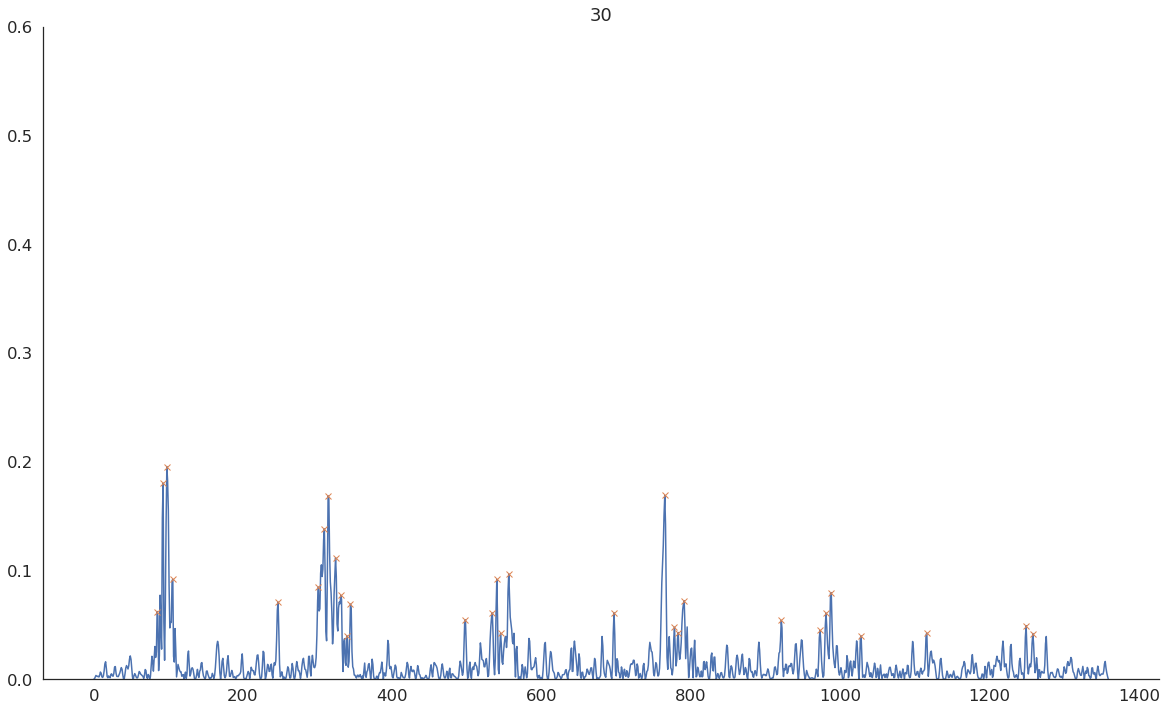

In [26]:
n=66

plt.figure(figsize=(20,12))
plt.plot(dmel1.wbts[n][0].T);
plt.ylim(-.05,.05);
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/cleanNOT_mel_wbt.eps", format='eps', bbox_inches='tight');

plt.figure(figsize=(20,12))
plt.ylim(0,.6)
show_peaks(dmel1.psds[n][0].T[140:1500]);

plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/cleanNOT_mel_psd.eps", format='eps', bbox_inches='tight')

In [28]:
dmel1.psds[n][0].T[140:1500].sum()

20.185349

## Clean vs dirty (OLD)

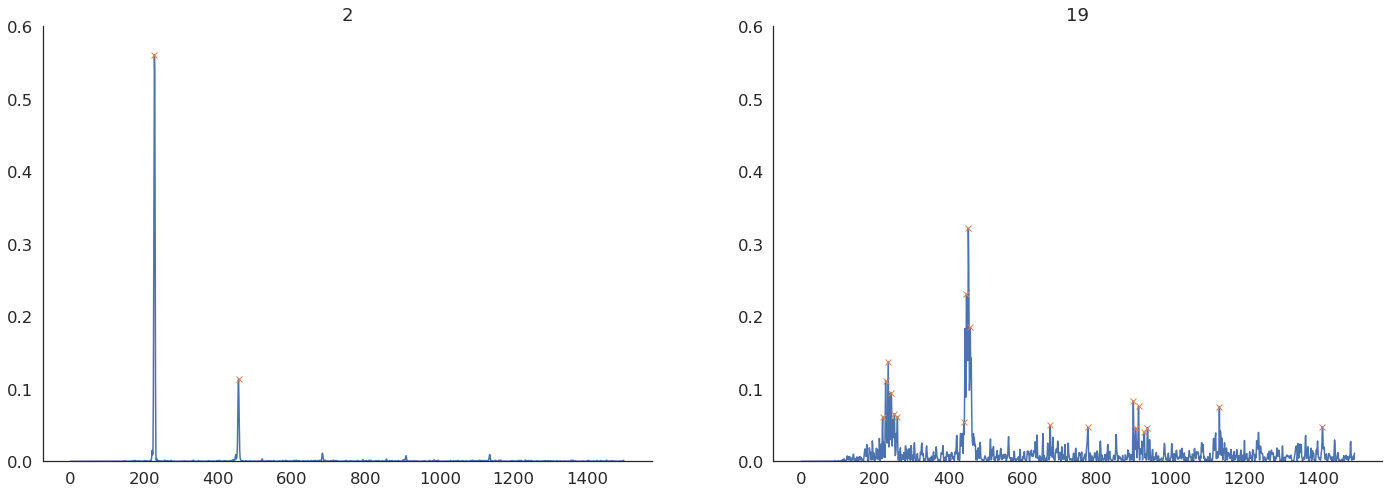

In [152]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
show_peaks(dsuz1.psds[14][0].T);
plt.ylim(0,.6)
plt.subplot(1,2,2)
show_peaks(dsuz1.psds[30][0].T);
plt.ylim(0,.6);
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/cleandirty.eps", format='eps', bbox_inches='tight')

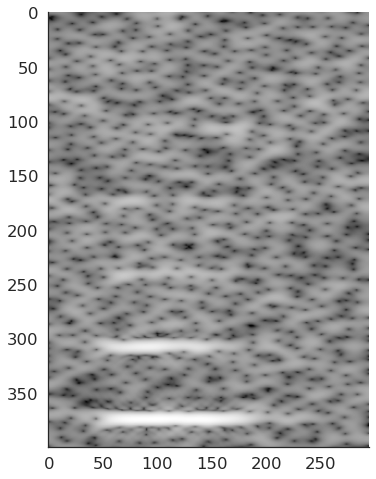

In [10]:
spec = torch.flipud(dsuz1.stfts[14][0][0])
plt.figure(figsize=(14,8))
plt.imshow(spec, cmap="gray");
# plt.title(spec.shape);
# plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/stft.eps", format='eps', bbox_inches='tight');

In [11]:
from utils import get_datestr_range

all_dates = get_datestr_range(start='20201102', end='20210127');

def plotrange(date_df):
    hist_dict = date_df.datestr.value_counts().to_dict()
    mydict = {}
    for d in all_dates:
        if d not in list(hist_dict.keys()):
            mydict[d] = None
        else:
            mydict[d] = hist_dict[d]

    series = pd.Series(mydict)
    ax = series.sort_index().plot(xticks=range(0,series.shape[0]), figsize=(24,8), rot=90, linewidth=2)
    ax.set_xticklabels(series.index);
    return series

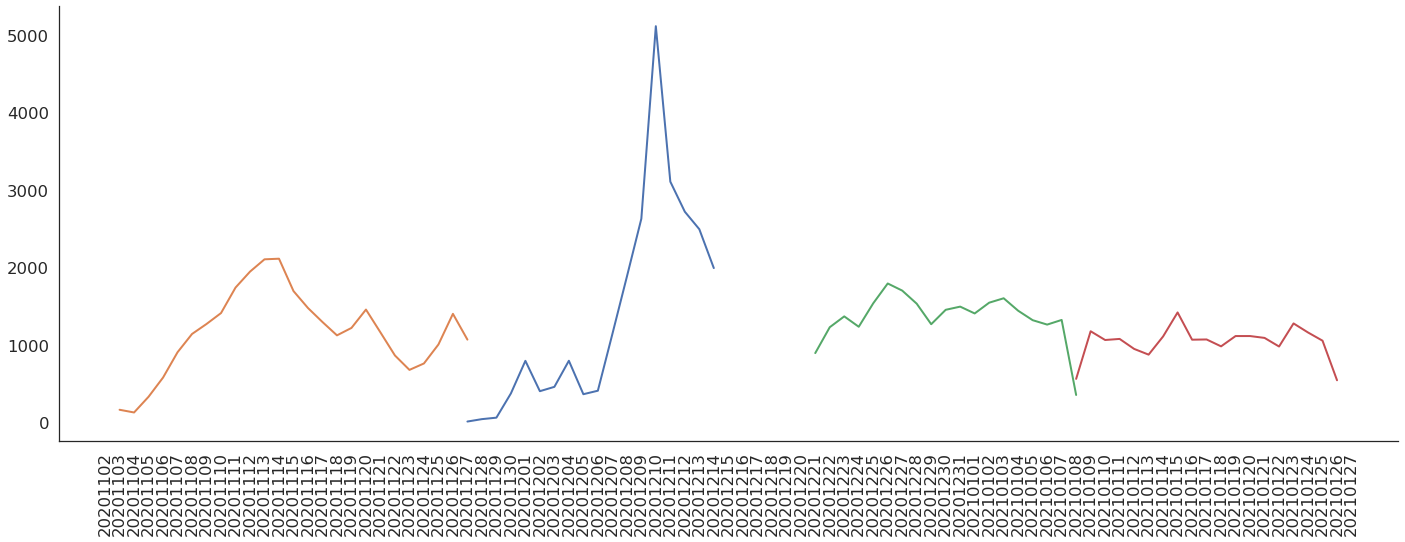

In [12]:
m1 = plotrange(dmel1.df)
m2 = plotrange(dmel2.df)
s1 = plotrange(dsuz1.df)
s2 = plotrange(dsuz2.df)
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/dates.eps", format='eps', bbox_inches='tight');

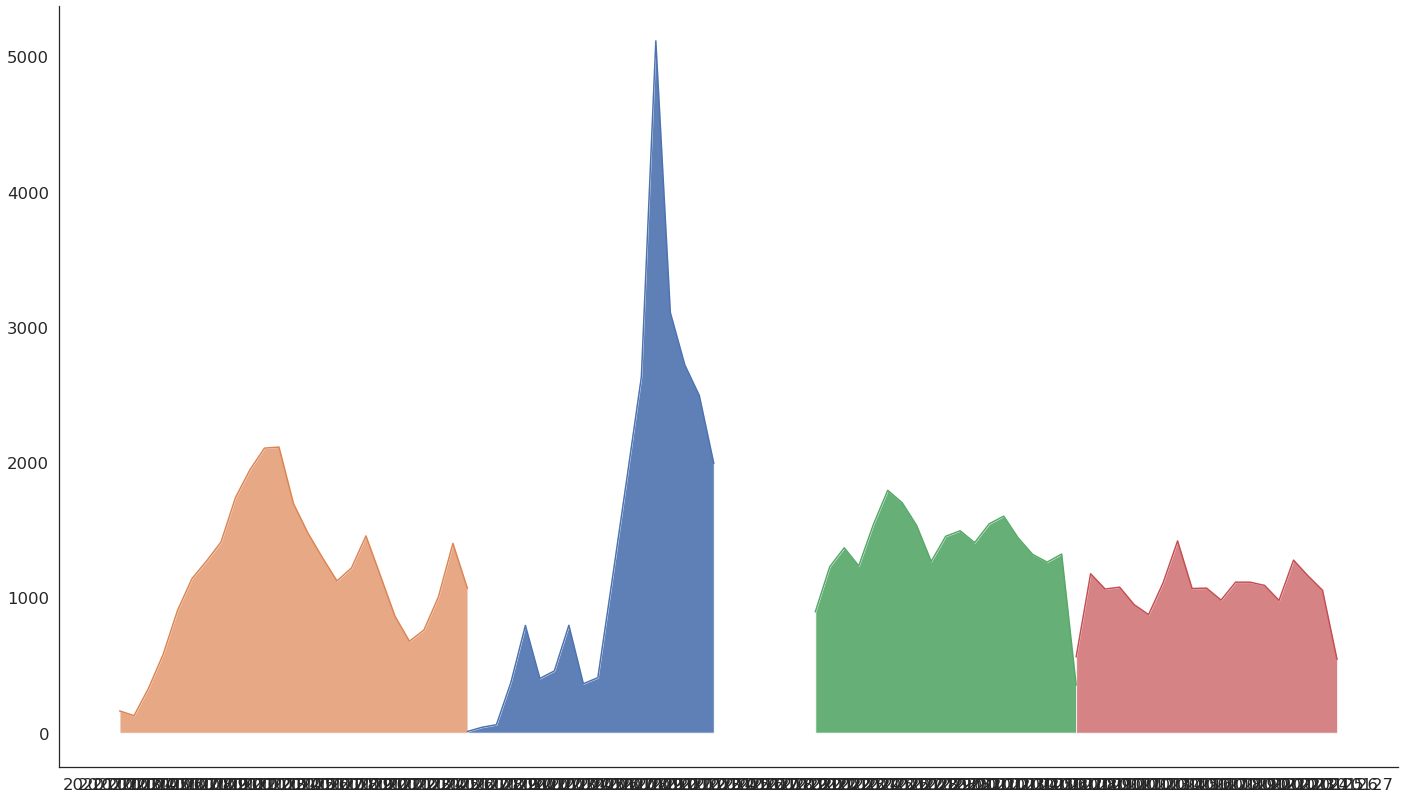

In [14]:
def fillplot(ser, alpha=0.5):    
    counts = ser.values
    dates = ser.index
    plt.plot(dates, counts)
    plt.fill_between(dates,counts, alpha=alpha)

plt.figure(figsize=(24,14))
fillplot(m1, 0.9)
fillplot(m2, 0.7)
fillplot(s1, 0.9)
fillplot(s2, 0.7)
plt.savefig("/home/kalfasyan/Dropbox/kuleuven/paper2_figures/dates2.pdf", format='pdf', bbox_inches='tight');

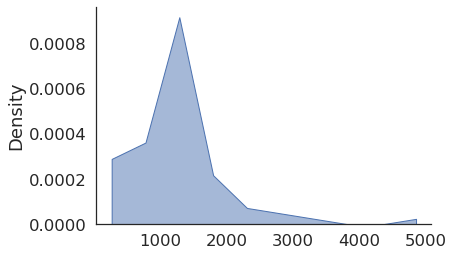

In [15]:
import seaborn as sns
sns.histplot(pd.concat([m1,m2,s1,s2]), stat='density', element='poly', palette=sns.color_palette("colorblind", n_colors=2), bins=10, alpha=.5);

In [16]:
for i in [m1,m2,s1,s2]:
    print(i.sum())

24763.0
29002.0
25732.0
19657.0
